In [1]:
#Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df=pd.read_csv("webmd.csv")

In [3]:
#Print first five rows
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [4]:
#find rows and columns
df.shape

(362806, 12)

# EDA

In [5]:
#check all the informations about data like null values.range index,data type etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [6]:
#statistical summary of dataset
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [7]:
#to check for null values
df.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [8]:
#check for duplicated rows
duplicates=df[df.duplicated()]
print("Duplicate rows:\n",duplicates)

Duplicate rows:
                Age                                          Condition  \
12102        55-64                                High Blood Pressure   
17120        55-64                                High Blood Pressure   
21816   75 or over                                              Other   
22427        35-44                   Abnormally Long or Heavy Periods   
24302        25-34    Fungal Infection of Fingernails - Onychomycosis   
...            ...                                                ...   
339647       55-64                                     Diverticulitis   
339648       55-64                                     Diverticulitis   
343090       25-34                                 Excessive Sweating   
343390       25-34                                 Excessive Sweating   
353563       55-64  Drying and Inflammation of Cornea and Conjunct...   

              Date                                          Drug  DrugId  \
12102    5/22/2013            

In [9]:
#to remove duplicated rows
df.drop_duplicates(inplace=True)

In [10]:
#again check for any duplicated rows present
duplicates=df[df.duplicated()]
duplicates

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount


# Univariate Analysis

Histogram

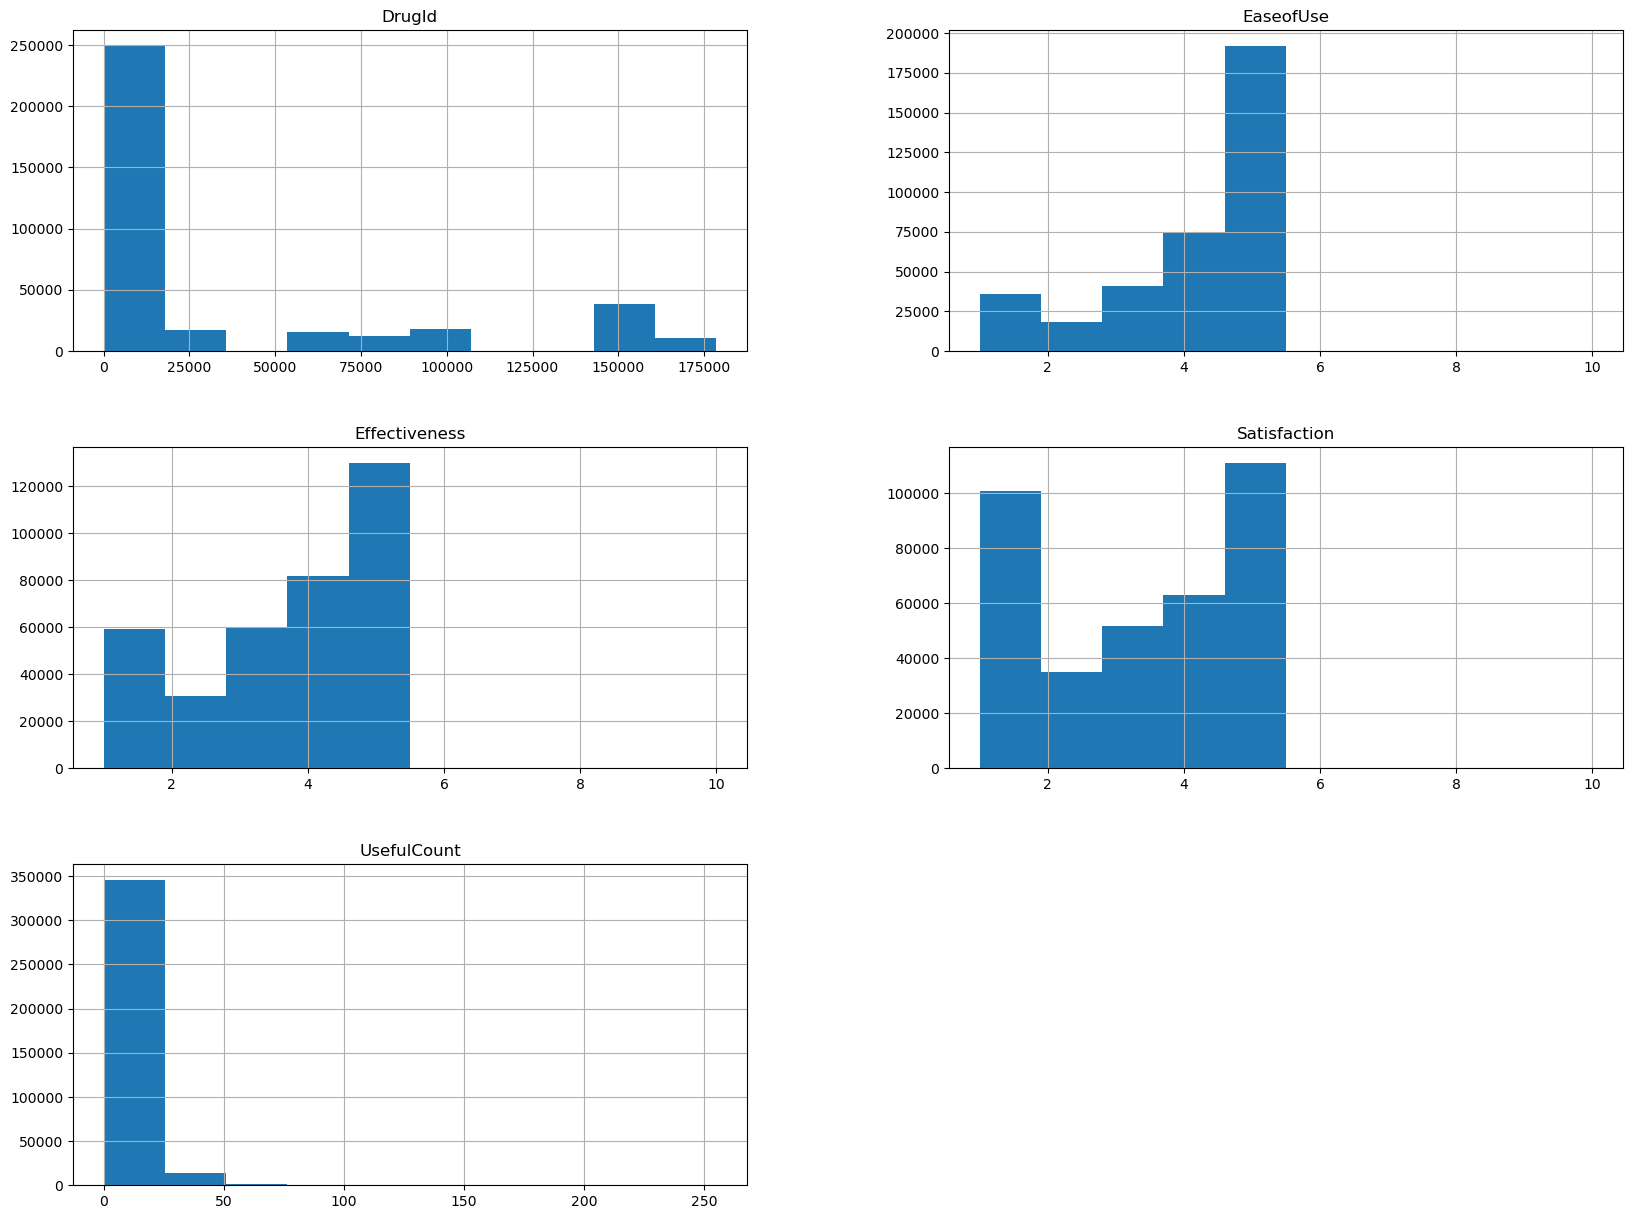

In [11]:
freqgraph=df.select_dtypes(include=['int','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

Boxplot

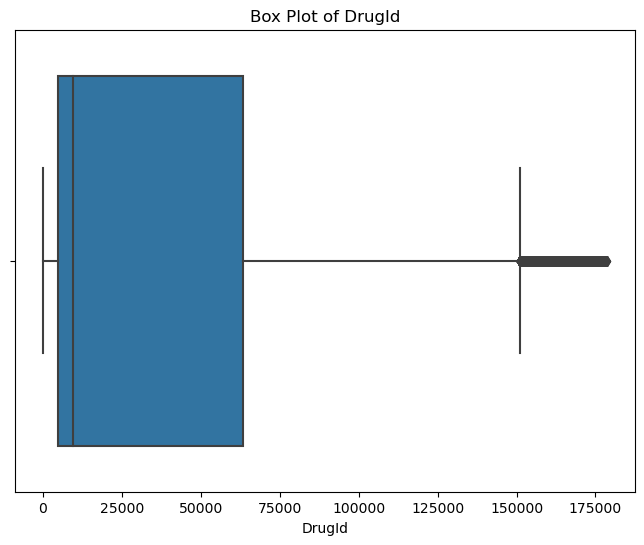

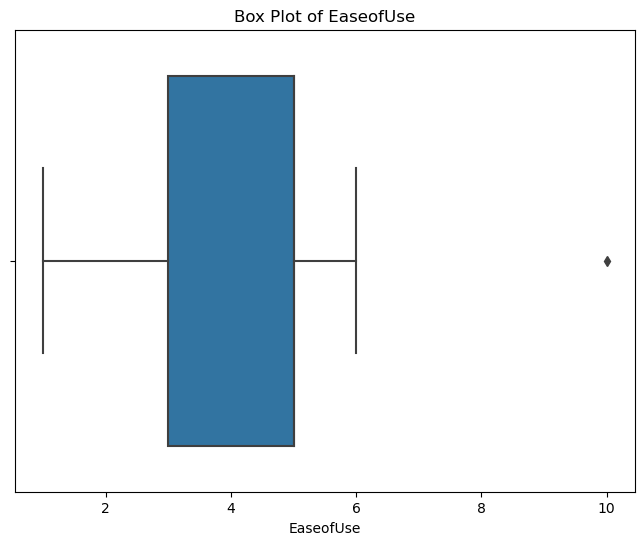

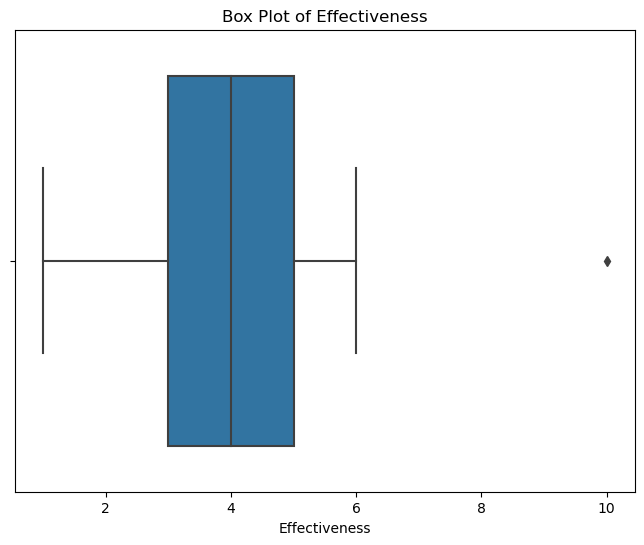

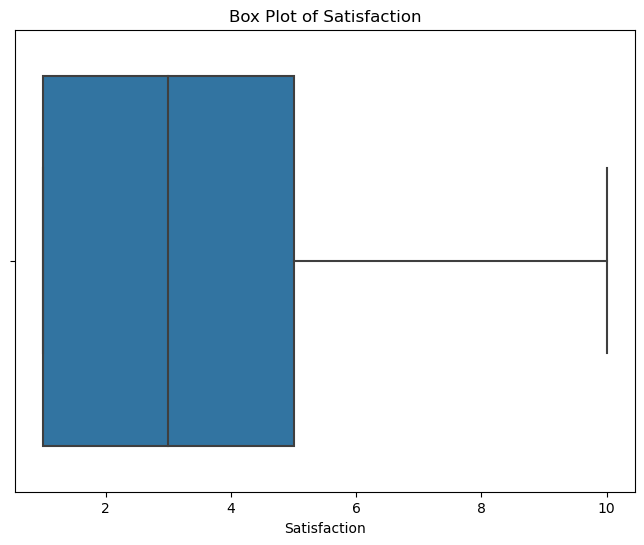

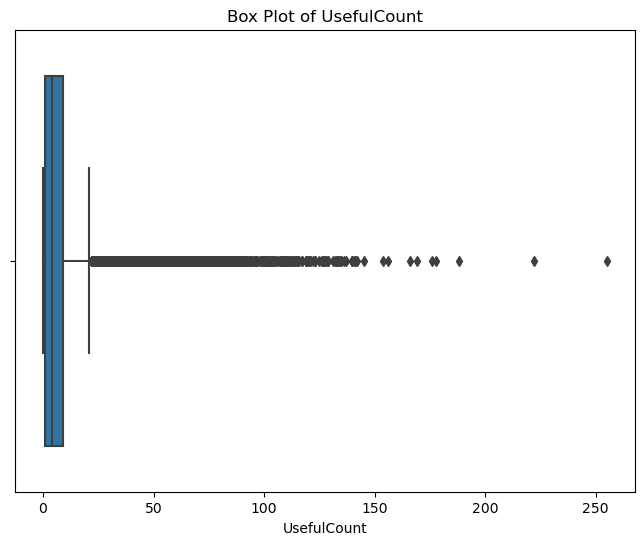

In [12]:
# Select numeric columns for box plots
numeric_columns =df.select_dtypes(include=['float64','int64']).columns
# Plot box plot for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column].dropna())
    plt.title('Box Plot of ' + column)
    plt.xlabel(column)
    plt.show()

KDE (Kernel Distribution Estimation Plot) Plot

<AxesSubplot:xlabel='UsefulCount', ylabel='Density'>

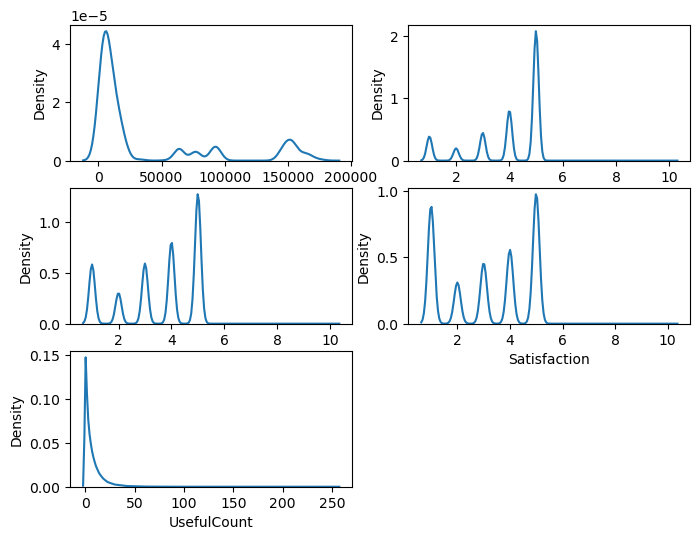

In [13]:
plt.figure(figsize=(8,6))
plt.subplot(3,2,1)
sns.kdeplot(x='DrugId',data=df,palette='Set2')
plt.subplot(3,2,2)
sns.kdeplot(x='EaseofUse',data=df,palette='Set2')
plt.subplot(3,2,3)
sns.kdeplot(x='Effectiveness',data=df,palette='Set2')
plt.subplot(3,2,4)
sns.kdeplot(x='Satisfaction',data=df,palette='Set2')
plt.subplot(3,2,5)
sns.kdeplot(x='UsefulCount',data=df,palette='Set2')

Count Plots

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '75 or over'),
  Text(1, 0, '25-34'),
  Text(2, 0, '65-74'),
  Text(3, 0, '35-44'),
  Text(4, 0, '55-64'),
  Text(5, 0, '45-54'),
  Text(6, 0, '19-24'),
  Text(7, 0, ' '),
  Text(8, 0, '13-18'),
  Text(9, 0, '7-12'),
  Text(10, 0, '0-2'),
  Text(11, 0, '3-6')])

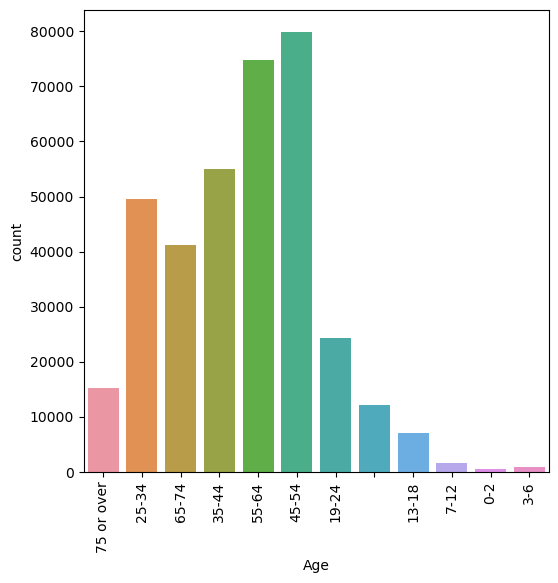

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='Age', data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Satisfaction', ylabel='count'>

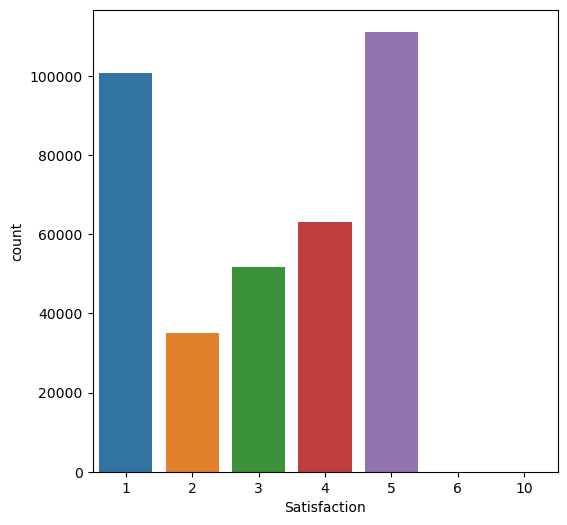

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='Satisfaction', data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

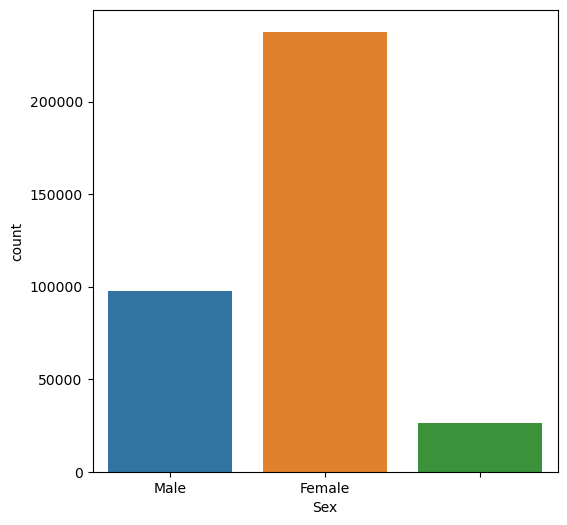

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', data=df)

<AxesSubplot:xlabel='Effectiveness', ylabel='count'>

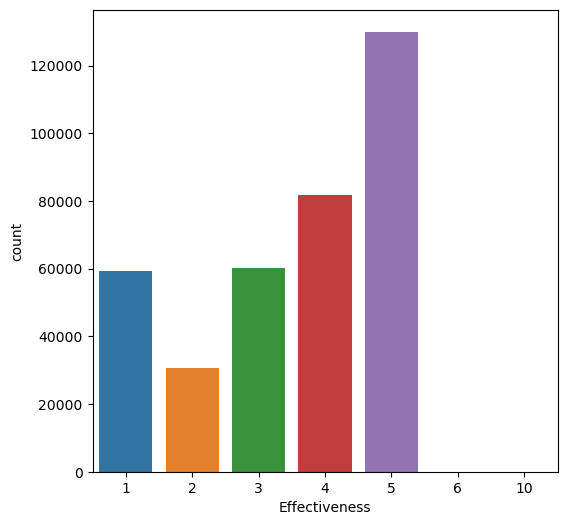

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='Effectiveness', data=df)

Pie Chart for categorical datas

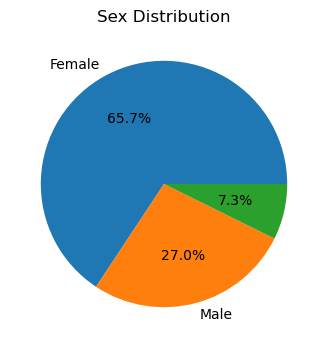

In [33]:
# Count the occurrences of each sex
sex_counts = df_filtered['Sex'].value_counts()

# Create a pie chart for the sex distribution
plt.figure(figsize=(8, 4))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

Bivariate Analysis

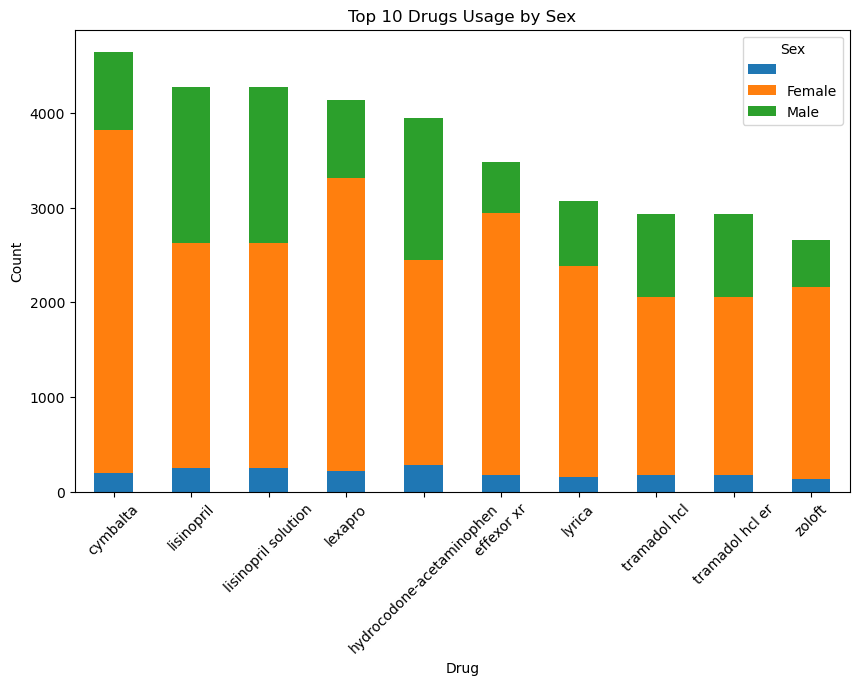

In [34]:
drug_counts = df['Drug'].value_counts().nlargest(10)
drug_sex_counts = df.groupby(['Drug', 'Sex']).size().unstack().loc[drug_counts.index]
drug_sex_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 10 Drugs Usage by Sex')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.xticks(rotation=45)
plt.show()

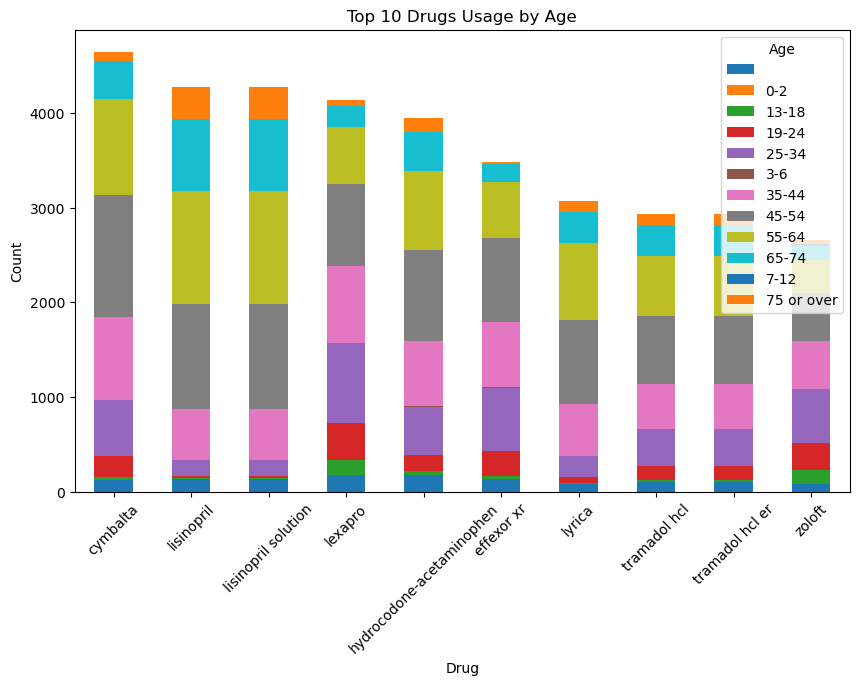

In [35]:
drug_counts = df['Drug'].value_counts().nlargest(10)
drug_sex_counts = df.groupby(['Drug', 'Age']).size().unstack().loc[drug_counts.index]
drug_sex_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top 10 Drugs Usage by Age')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Age', loc='upper right')
plt.xticks(rotation=45)
plt.show()

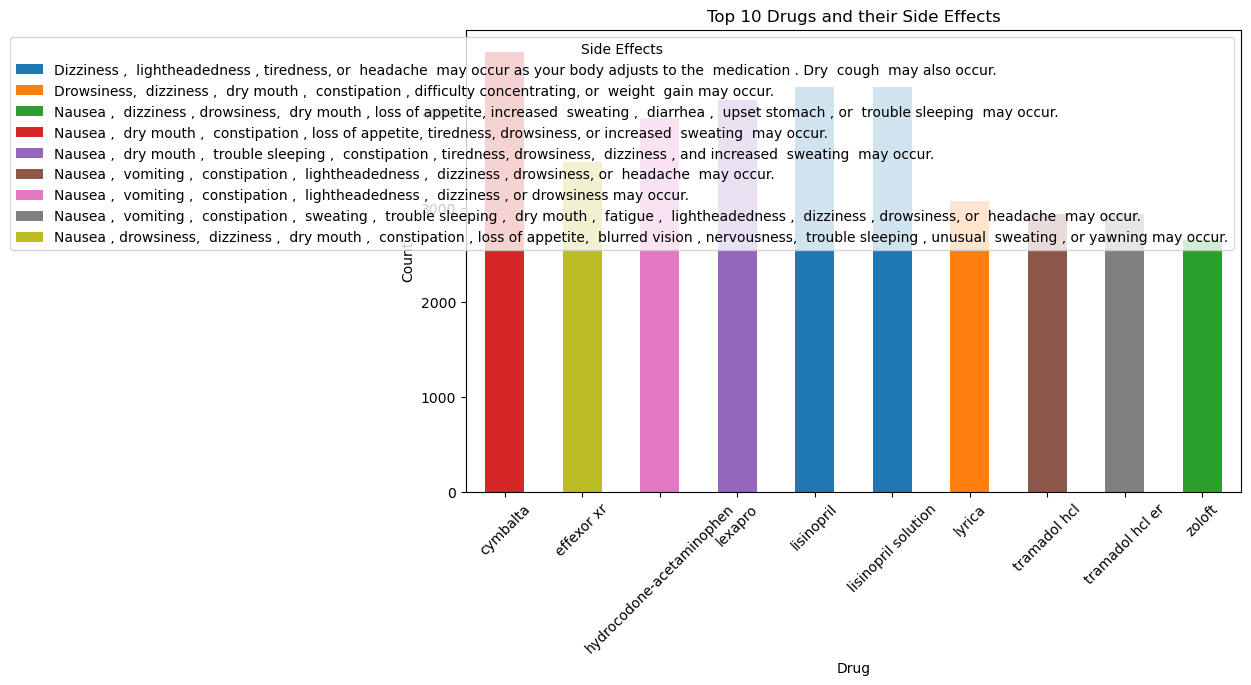

In [38]:
drug_counts = df['Drug'].value_counts().nlargest(10)
top_drugs_df = df[df['Drug'].isin(drug_counts.index)]
drug_side_counts = top_drugs_df.groupby(['Drug', 'Sides']).size().unstack()
drug_side_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top 10 Drugs and their Side Effects')
plt.xlabel('Drug')
plt.ylabel('Count')

plt.legend(title='Side Effects', loc='upper right')
plt.xticks(rotation=45)

plt.show()


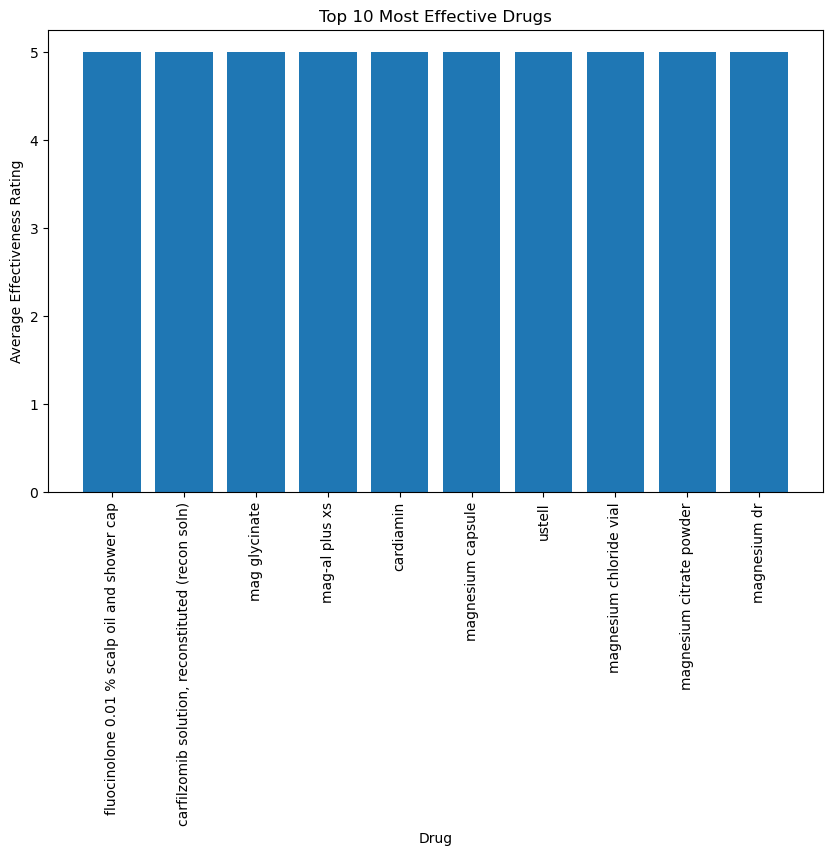

In [44]:
# Group the data by 'Drug' and calculate the average effectiveness rating for each drug
drug_effectiveness = df.groupby('Drug')['Effectiveness'].mean().sort_values(ascending=False)

# Get the top 10 most effective drugs
top_10_drugs = drug_effectiveness.head(10)

# Plot a bar chart to visualize the effectiveness ratings of the top 10 drugs
plt.figure(figsize=(10, 6))
plt.bar(top_10_drugs.index, top_10_drugs.values)

plt.title('Top 10 Most Effective Drugs')
plt.xlabel('Drug')
plt.ylabel('Average Effectiveness Rating')

plt.xticks(rotation=90)

plt.show()

Multivariate Analysis

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
DrugId,1.000000,-0.019881,-0.011821,-0.036457,0.011104
EaseofUse,-0.019881,1.000000,0.552332,0.563784,0.028080
Effectiveness,-0.011821,0.552332,1.000000,0.793096,0.047670
Satisfaction,-0.036457,0.563784,0.793096,1.000000,0.018293
UsefulCount,0.011104,0.028080,0.047670,0.018293,1.000000


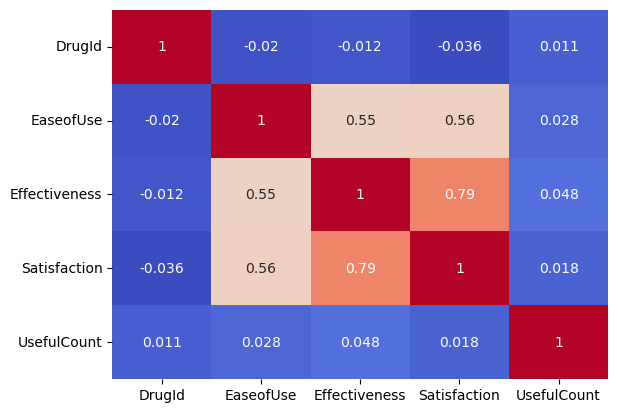

In [42]:
# Heatmap
corr=df.corr()
sns.heatmap(corr,annot=True,cbar=False,cmap= 'coolwarm')
corr

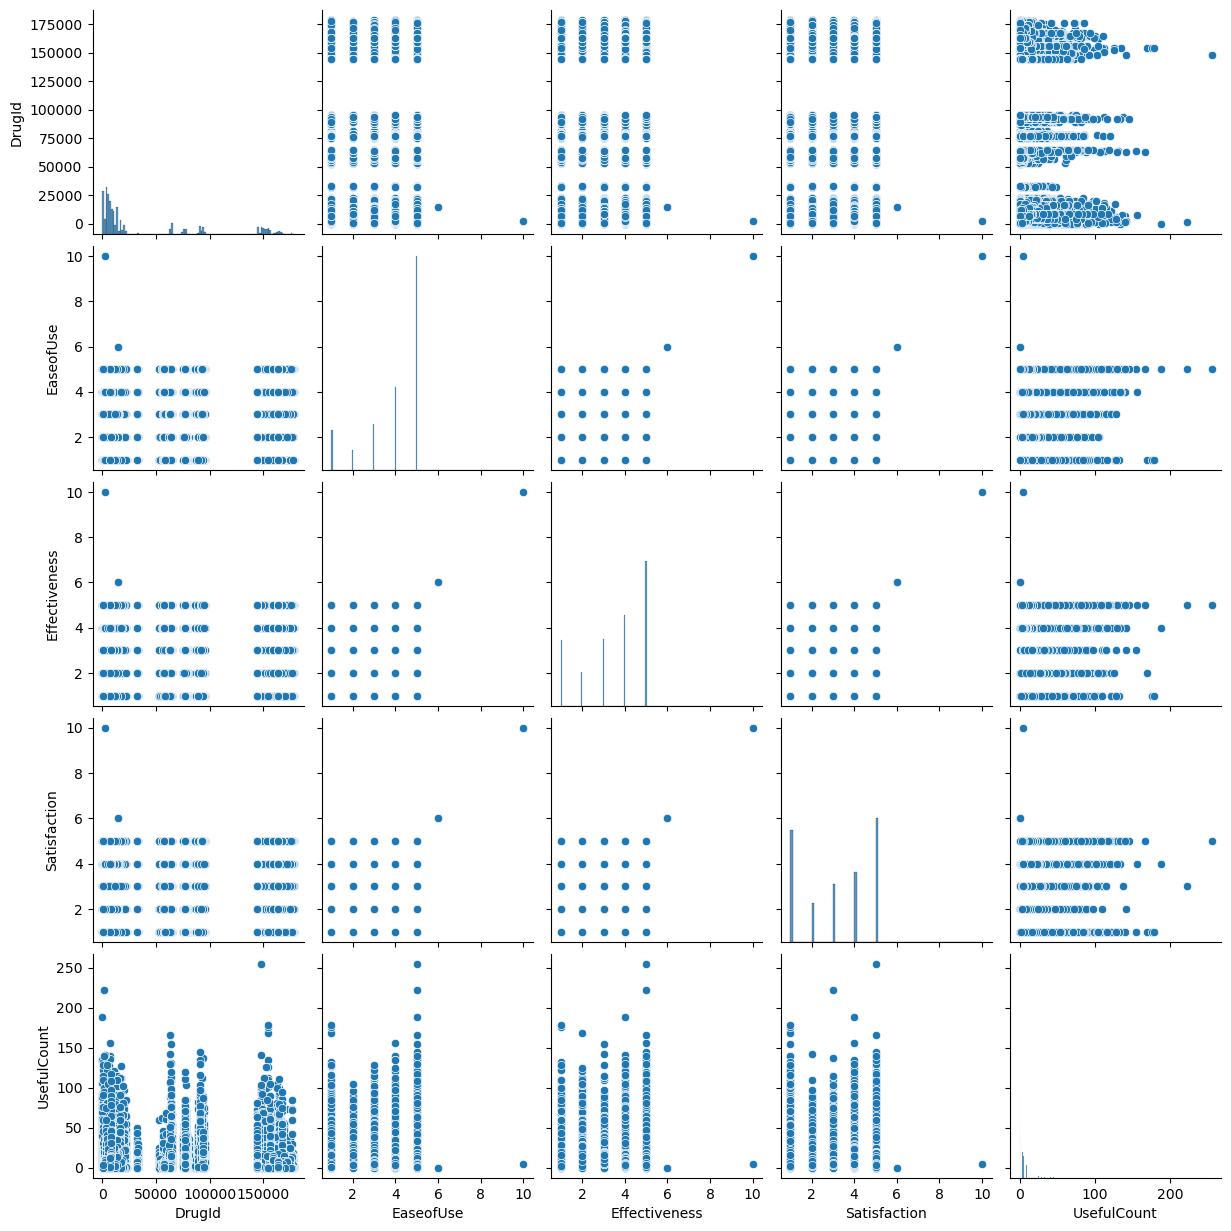

In [21]:
#Pair Plot
sns.pairplot(df)